In [11]:
import pandas as pd


import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt



In [12]:
train = pd.read_csv('data/train.csv', index_col=0)
train.head()

,user_id,ts,gate_id
0,18,2022-07-29 09:08:54,7
1,18,2022-07-29 09:09:54,9
2,18,2022-07-29 09:09:54,9
3,18,2022-07-29 09:10:06,5
4,18,2022-07-29 09:10:08,5


In [13]:
len(sorted(train['user_id'].unique()))

56

<Axes: xlabel='user_id'>

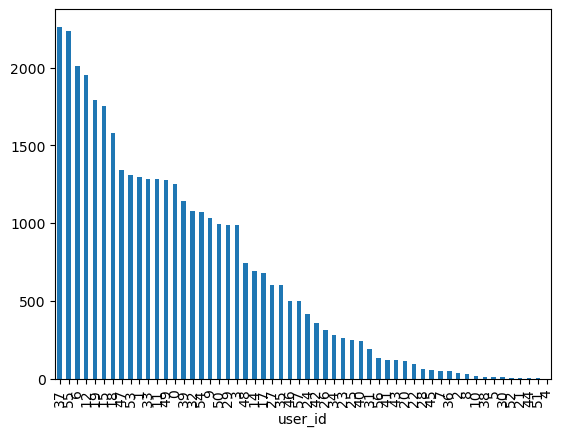

In [14]:
train['user_id'].value_counts().plot(kind='bar')

#### Оставим только тех, кто появлялся на работе за последний месяц
В обучающей выборке присутствуют данные до 31.12.2022, а в тестовой с 01.01.2023, поэтому было бы разумно оставить только тех работников, которые находились в компании на этот момент

In [15]:
from datetime import datetime

In [16]:
train['ts'] = pd.to_datetime(train['ts'])
train['ts'].agg(['max', 'min', 'count'])

max      2022-12-31 20:39:31
min      2022-07-29 09:08:54
count                  37518
Name: ts, dtype: object

In [17]:
#One month before last date
cutoff_date = pd.Timestamp('2022-11-30 00:00:00')
cutted_train = train[train['ts'] > cutoff_date]

In [18]:
len(sorted(cutted_train['user_id'].unique()))

43

In [19]:
last_month_users = sorted(train['user_id'].unique())

In [21]:


ts_1 = train['ts'][0]
ts_dt_1 = datetime.strptime(ts_1, '%Y-%m-%d %H:%M:%S')

ts_2 = train['ts'][1]
ts_dt_2 = datetime.strptime(ts_2, '%Y-%m-%d %H:%M:%S')

ts_dt_1, ts_dt_2, max(ts_dt_1, ts_dt_2)

TypeError: strptime() argument 1 must be str, not Timestamp

In [22]:
train['user_id'].value_counts()

user_id
37    2262
55    2238
6     2013
12    1953
19    1793
15    1756
18    1578
47    1341
53    1311
1     1299
33    1285
11    1281
49    1275
0     1250
39    1144
32    1076
54    1070
9     1034
50     994
29     990
3      989
48     743
14     696
17     677
27     603
35     601
46     502
57     497
24     416
42     359
26     316
34     284
23     261
25     247
40     242
31     191
56     137
41     124
43     124
20     115
22      96
28      64
45      57
7       49
36      48
2       39
8       29
10      17
38      13
5       10
30      10
52       5
21       5
44       4
51       3
4        2
Name: count, dtype: int64

### Глядим на данные

In [23]:
train['day'] = train['ts'].dt.day
train['month'] = train['ts'].dt.month

train['hours'] = train['ts'].dt.hour
train['minutes'] = train['ts'].dt.minute

In [24]:
train[(train["user_id"] == 0) & (train["day"] == 1) & (train["month"] == 8)]

,user_id,ts,gate_id,day,month,hours,minutes
644,0,2022-08-01 10:59:52,7,1,8,10,59
647,0,2022-08-01 11:00:54,3,1,8,11,0
648,0,2022-08-01 11:00:56,3,1,8,11,0
650,0,2022-08-01 11:01:12,10,1,8,11,1
744,0,2022-08-01 12:59:02,6,1,8,12,59
746,0,2022-08-01 12:59:04,6,1,8,12,59
771,0,2022-08-01 13:32:39,3,1,8,13,32
773,0,2022-08-01 13:32:41,3,1,8,13,32
1002,0,2022-08-01 18:39:40,11,1,8,18,39
1003,0,2022-08-01 18:40:05,4,1,8,18,40


In [25]:


groupped = train.groupby(['user_id', 'day', 'month'])
groupped.count()

ts  gate_id  hours  minutes
user_id day month                             
0       1   8      11       11     11       11
            9       7        7      7        7
            11     21       21     21       21
            12     13       13     13       13
        2   8      13       13     13       13
...                ..      ...    ...      ...
57      29  8      14       14     14       14
            9       7        7      7        7
        30  8      13       13     13       13
            9      14       14     14       14
        31  8      13       13     13       13

[2521 rows x 4 columns]